**Exercise 6.31**. Simulate a nonstationary time series with $n = 60$ according to the model ARIMA(0,1,1) with $\theta = 0.8$. 

**(a)** Perform the (augmented) Dickey-Fuller test on the series with $k = 0$ in Equation (6.4.1) on page 128. (With $k = 0$, this is the Dickey-Fuller test and is not augmented.) Comment on the results. 

**(b)** Perform the augmented Dickey-Fuller test on the series with $k$ chosen by the software—that is, the “best” value for $k$. Comment on the results. 

**(c)** Repeat parts (a) and (b) but use the differences of the simulated series. Comment on the results. (Here, of course, you should reject the unit root hypothesis.) 

**Solution**.

The conclusions for this exercise are more intuitive if we instead use $\theta = -0.8$.  We will solve with the original value of $\theta = 0.8$, obtain insatisfactory conclusions, and then repeat the exercise with $\theta = -0.8$.

In [1]:
set.seed(0)
Y = arima.sim(model=list(ma=-0.8, order=c(0, 1, 1)), n=60)

Observe the series is not obviously nonstationary by visual inspection:

In [2]:
require(ggplot2)
require(latex2exp)

Loading required package: ggplot2

Loading required package: latex2exp



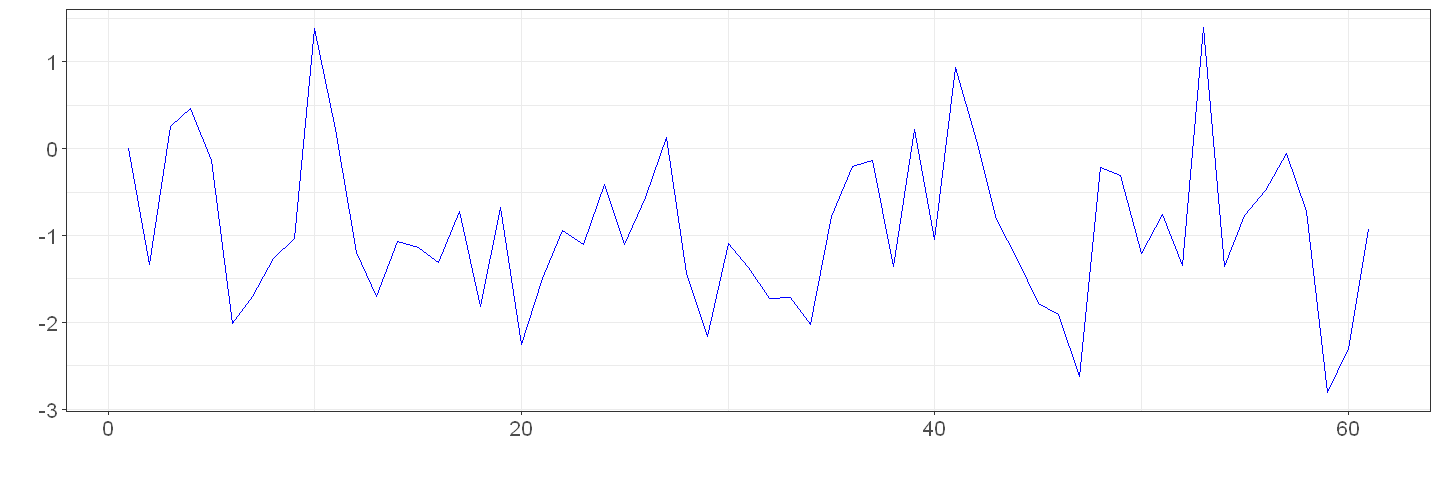

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

**(a)**

In [4]:
require(tseries)

Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [5]:
adf.test(Y, k=0, alternative="stationary")

Warning message in adf.test(Y, k = 0, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -6.0808, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


The Dick-Fuller test does reject nonstationarity (unit root). This disagrees with the series being nonstationary.

**(b)**

In [6]:
adf.test(Y)

Warning message in adf.test(Y):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -4.21, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


The Augmented Dick-Fuller test still rejects nonstationarity.

**(c)**

In [7]:
adf.test(diff(Y), k=0)

Warning message in adf.test(diff(Y), k = 0):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(Y)
Dickey-Fuller = -10.883, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [8]:
adf.test(diff(Y))

Warning message in adf.test(diff(Y)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(Y)
Dickey-Fuller = -6.3878, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


Both the Dick-Fuller nor the Augmented Dick-Fuller tests reject nonstationarity on the time series difference (now in agreement with the model.)

Now, repeating the exercise with $\theta = -0.8$:

In [9]:
set.seed(0)
Y = arima.sim(model=list(ma=0.8, order=c(0, 1, 1)), n=60)

The series is more obviously non-stationary, visually:

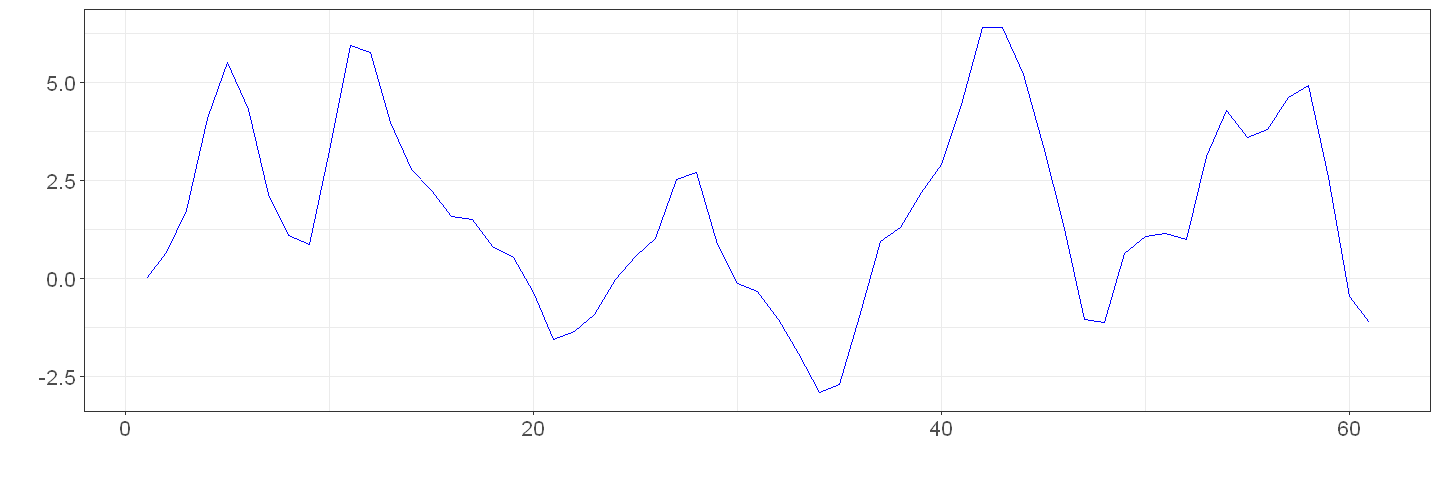

In [10]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

In [11]:
adf.test(Y, k=0)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -2.0941, Lag order = 0, p-value = 0.5368
alternative hypothesis: stationary


Now the Dick-Fuller test correctly does not reject stationarity (p-value over 0.05).

In [12]:
adf.test(Y)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -3.3391, Lag order = 3, p-value = 0.07387
alternative hypothesis: stationary


Augmented Dick-Fuller also does not reject non-stationarity (p-value still over 0.05, though only slightly).

In [13]:
adf.test(diff(Y), k=0)


	Augmented Dickey-Fuller Test

data:  diff(Y)
Dickey-Fuller = -4.0458, Lag order = 0, p-value = 0.01369
alternative hypothesis: stationary


In [14]:
adf.test(diff(Y))

Warning message in adf.test(diff(Y)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(Y)
Dickey-Fuller = -4.1844, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


For the series of differences, both the Dick-Fuller and the Augmented Dick-Fuller tests reject nonstationarity (correctly).

**Exercise 6.32**. Simulate a stationary time series of length $n = 36$ according to an AR(1) model with $\phi = 0.95$. This model is stationary, but just barely so. With such a series and a short history, it will be difficult if not impossible to distinguish between stationary and nonstationary with a unit root.

**(a)** Plot the series and calculate the sample ACF and PACF and describe what you see.

**(b)** Perform the (augmented) Dickey-Fuller test on the series with $k = 0$ in Equation (6.4.1) on page 128. (With $k = 0$ this is the Dickey-Fuller test and is not augmented.) Comment on the results.

**(c)** Perform the augmented Dickey-Fuller test on the series with $k$ chosen by the software—that is, the “best” value for $k$. Comment on the results.

**(d)** Repeat parts (a), (b), and (c) but with a new simulation with $n = 100$.

**Solution**.

In [15]:
set.seed(0)
Y = arima.sim(model=list(ar=0.95), n=36)

**(a)**

In [16]:
# Function to plot provided autocorrelations
plot_acf <- function(acf, title='ACF') {
    max_k = length(acf)
    k = seq(1, max_k)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() +
        geom_point(aes(x=k, y=acf), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, acf[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        ggtitle(title) +
        theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))
}

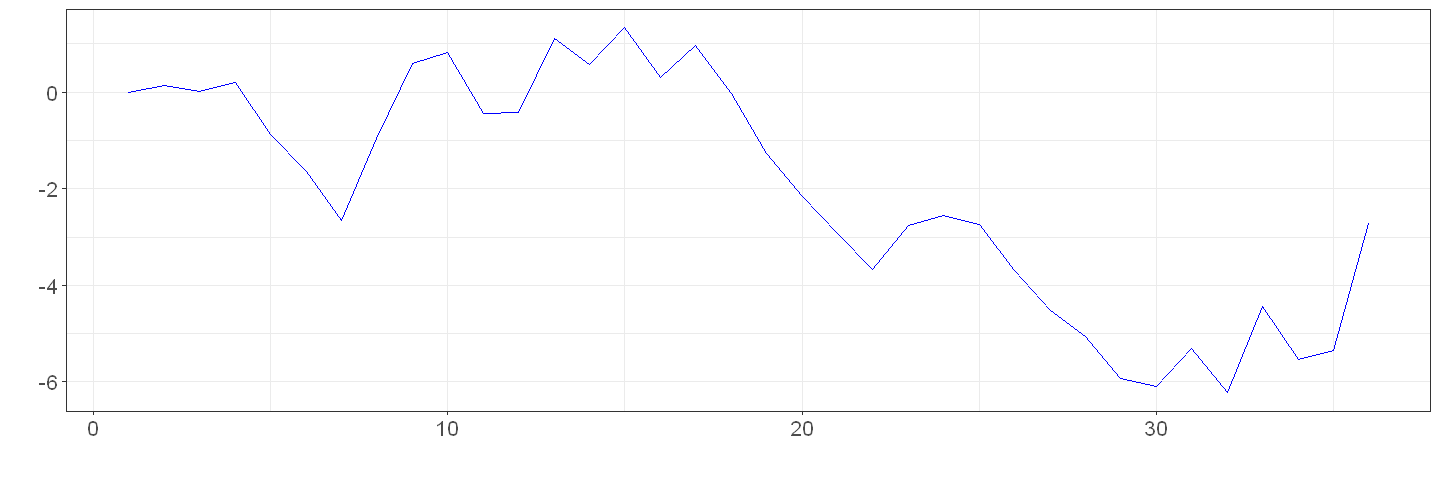

In [17]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

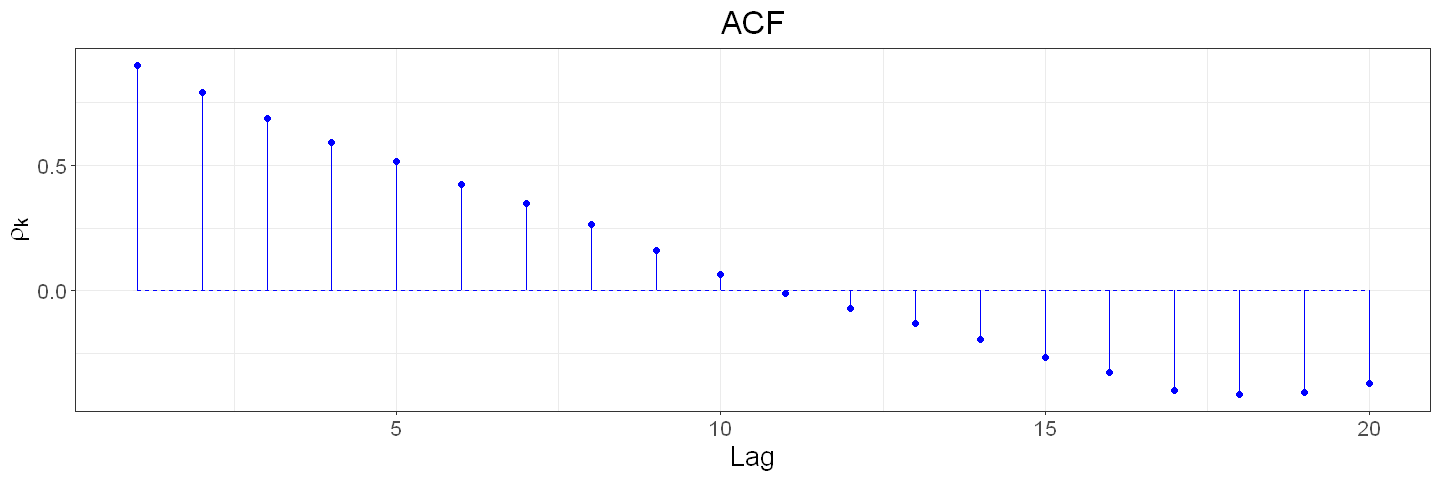

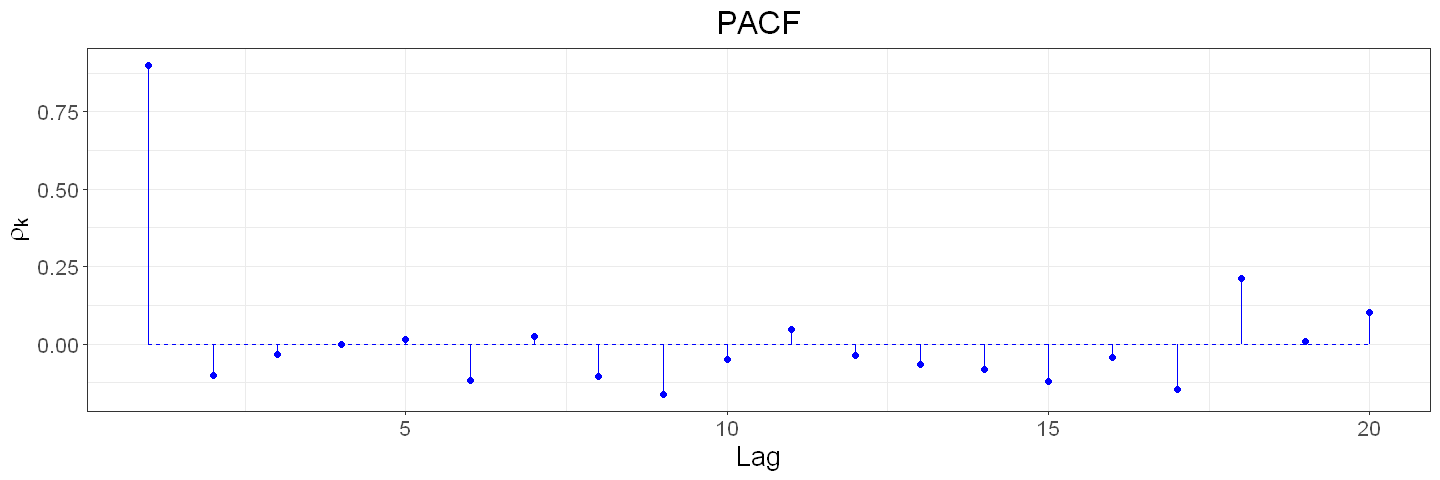

In [18]:
plot_acf(acf(Y, lag.max=20, plot=F)$acf[-1], title='ACF')
plot_acf(pacf(Y, lag.max=20, plot=F)$acf, title='PACF')

The PACF suggests an AR(1) model, but the series is not obviously stationary from the timeseries.

**(b)**

In [19]:
adf.test(Y, k=0)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -1.8258, Lag order = 0, p-value = 0.6409
alternative hypothesis: stationary


The Dick-Fuller test fails to reject nonstationarity.

**(c)**

In [20]:
adf.test(Y)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -1.6356, Lag order = 3, p-value = 0.7149
alternative hypothesis: stationary


The Augmented Dick-Fuller test fails to reject nonstationarity.

**(d)**

In [21]:
set.seed(0)
Y = arima.sim(model=list(ar=0.95), n=100)

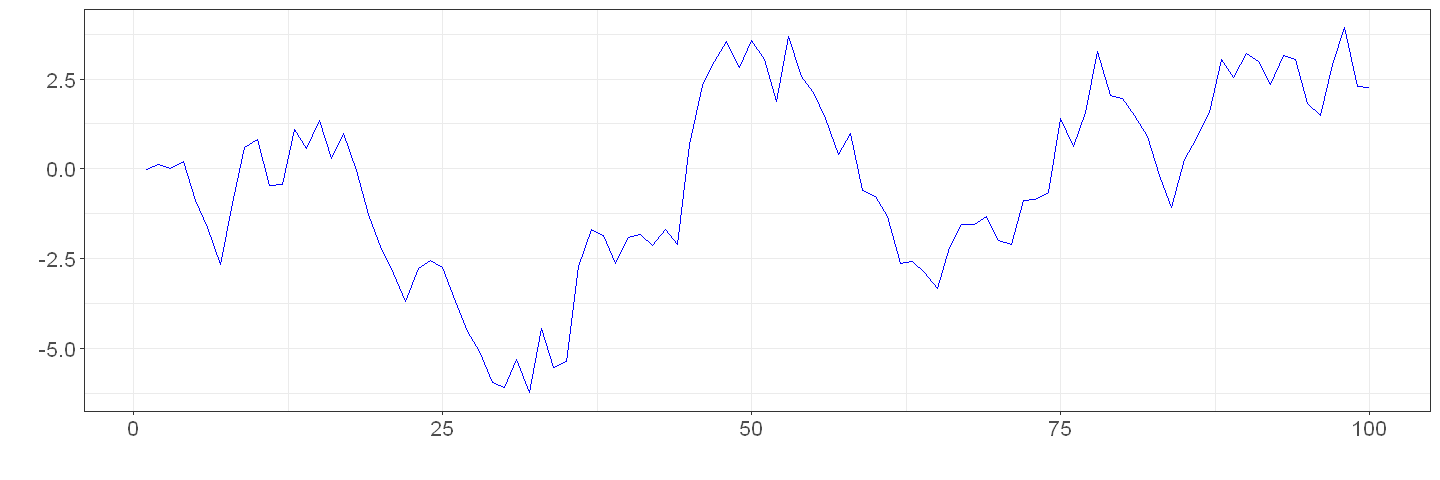

In [22]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() +
    geom_line(aes(x=1:length(Y), y=c(Y)), color='blue') +
    xlab('') + ylab('') +
    theme_bw() + theme(text = element_text(size=16), plot.title = element_text(hjust = 0.5))

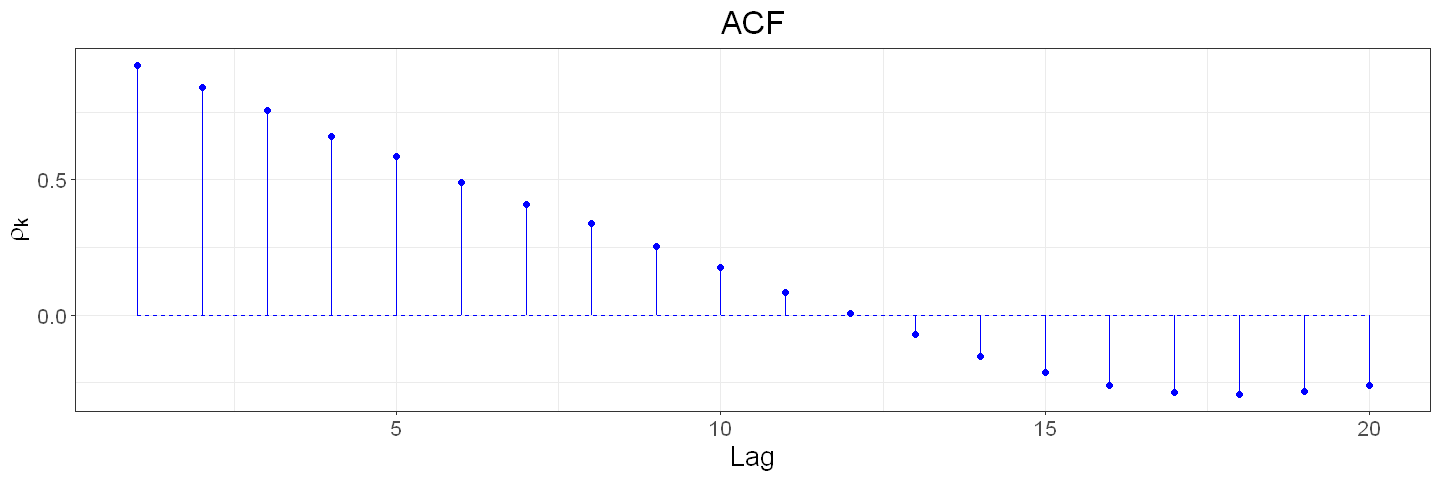

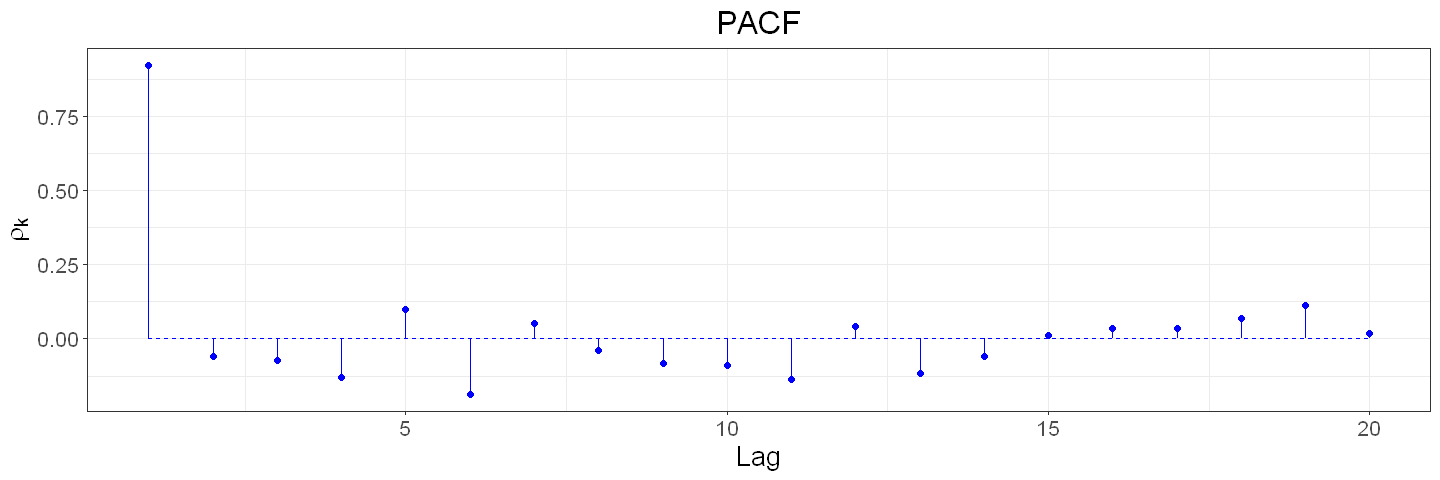

In [23]:
plot_acf(acf(Y, lag.max=20, plot=F)$acf[-1], title='ACF')
plot_acf(pacf(Y, lag.max=20, plot=F)$acf, title='PACF')

In [24]:
adf.test(Y, k=0)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -2.2681, Lag order = 0, p-value = 0.4656
alternative hypothesis: stationary


In [25]:
adf.test(Y)


	Augmented Dickey-Fuller Test

data:  Y
Dickey-Fuller = -2.3702, Lag order = 4, p-value = 0.4233
alternative hypothesis: stationary


Results look similar.